In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib = 3.5.2
import networkx as nx # networkx = 2.8.4
# import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
from utils import similarity_all


plt.rc('font', family='NanumBarunGothicOTF')


In [95]:

jobname = "통계학연구원"

job_major_sim, major_subject_sim, job_subject_sim_1, job_subject_sim_2, subject_subject_sim = similarity_all(jobname, "fasttext", threshold_subject=0.98)


In [96]:
majors = list(job_major_sim.keys())
subjects = list(job_subject_sim_1.keys())

In [97]:
subject_subject = list(subject_subject_sim.keys())
majors_weight = list(job_major_sim.values())

In [98]:
subject_subject = list()
for idx in range(len(subject_subject_sim)):
    subject_subject.append((list(subject_subject_sim.keys())[idx][0], list(subject_subject_sim.keys())[idx][1], list(subject_subject_sim.values())[idx]))

job_major = list()
for idx in range(len(job_major_sim)):
    job_major.append((jobname, majors[idx], job_major_sim[majors[idx]]))
    
major_subject = list()
for idx in range(len(major_subject_sim)):
    for subject in major_subject_sim[majors[idx]]:
        major_subject.append((majors[idx], subject, major_subject_sim[majors[idx]][subject]))


In [99]:
job_major

[('통계학연구원', '통계학과', 0.9599694), ('통계학연구원', '수학과', 0.97906303)]

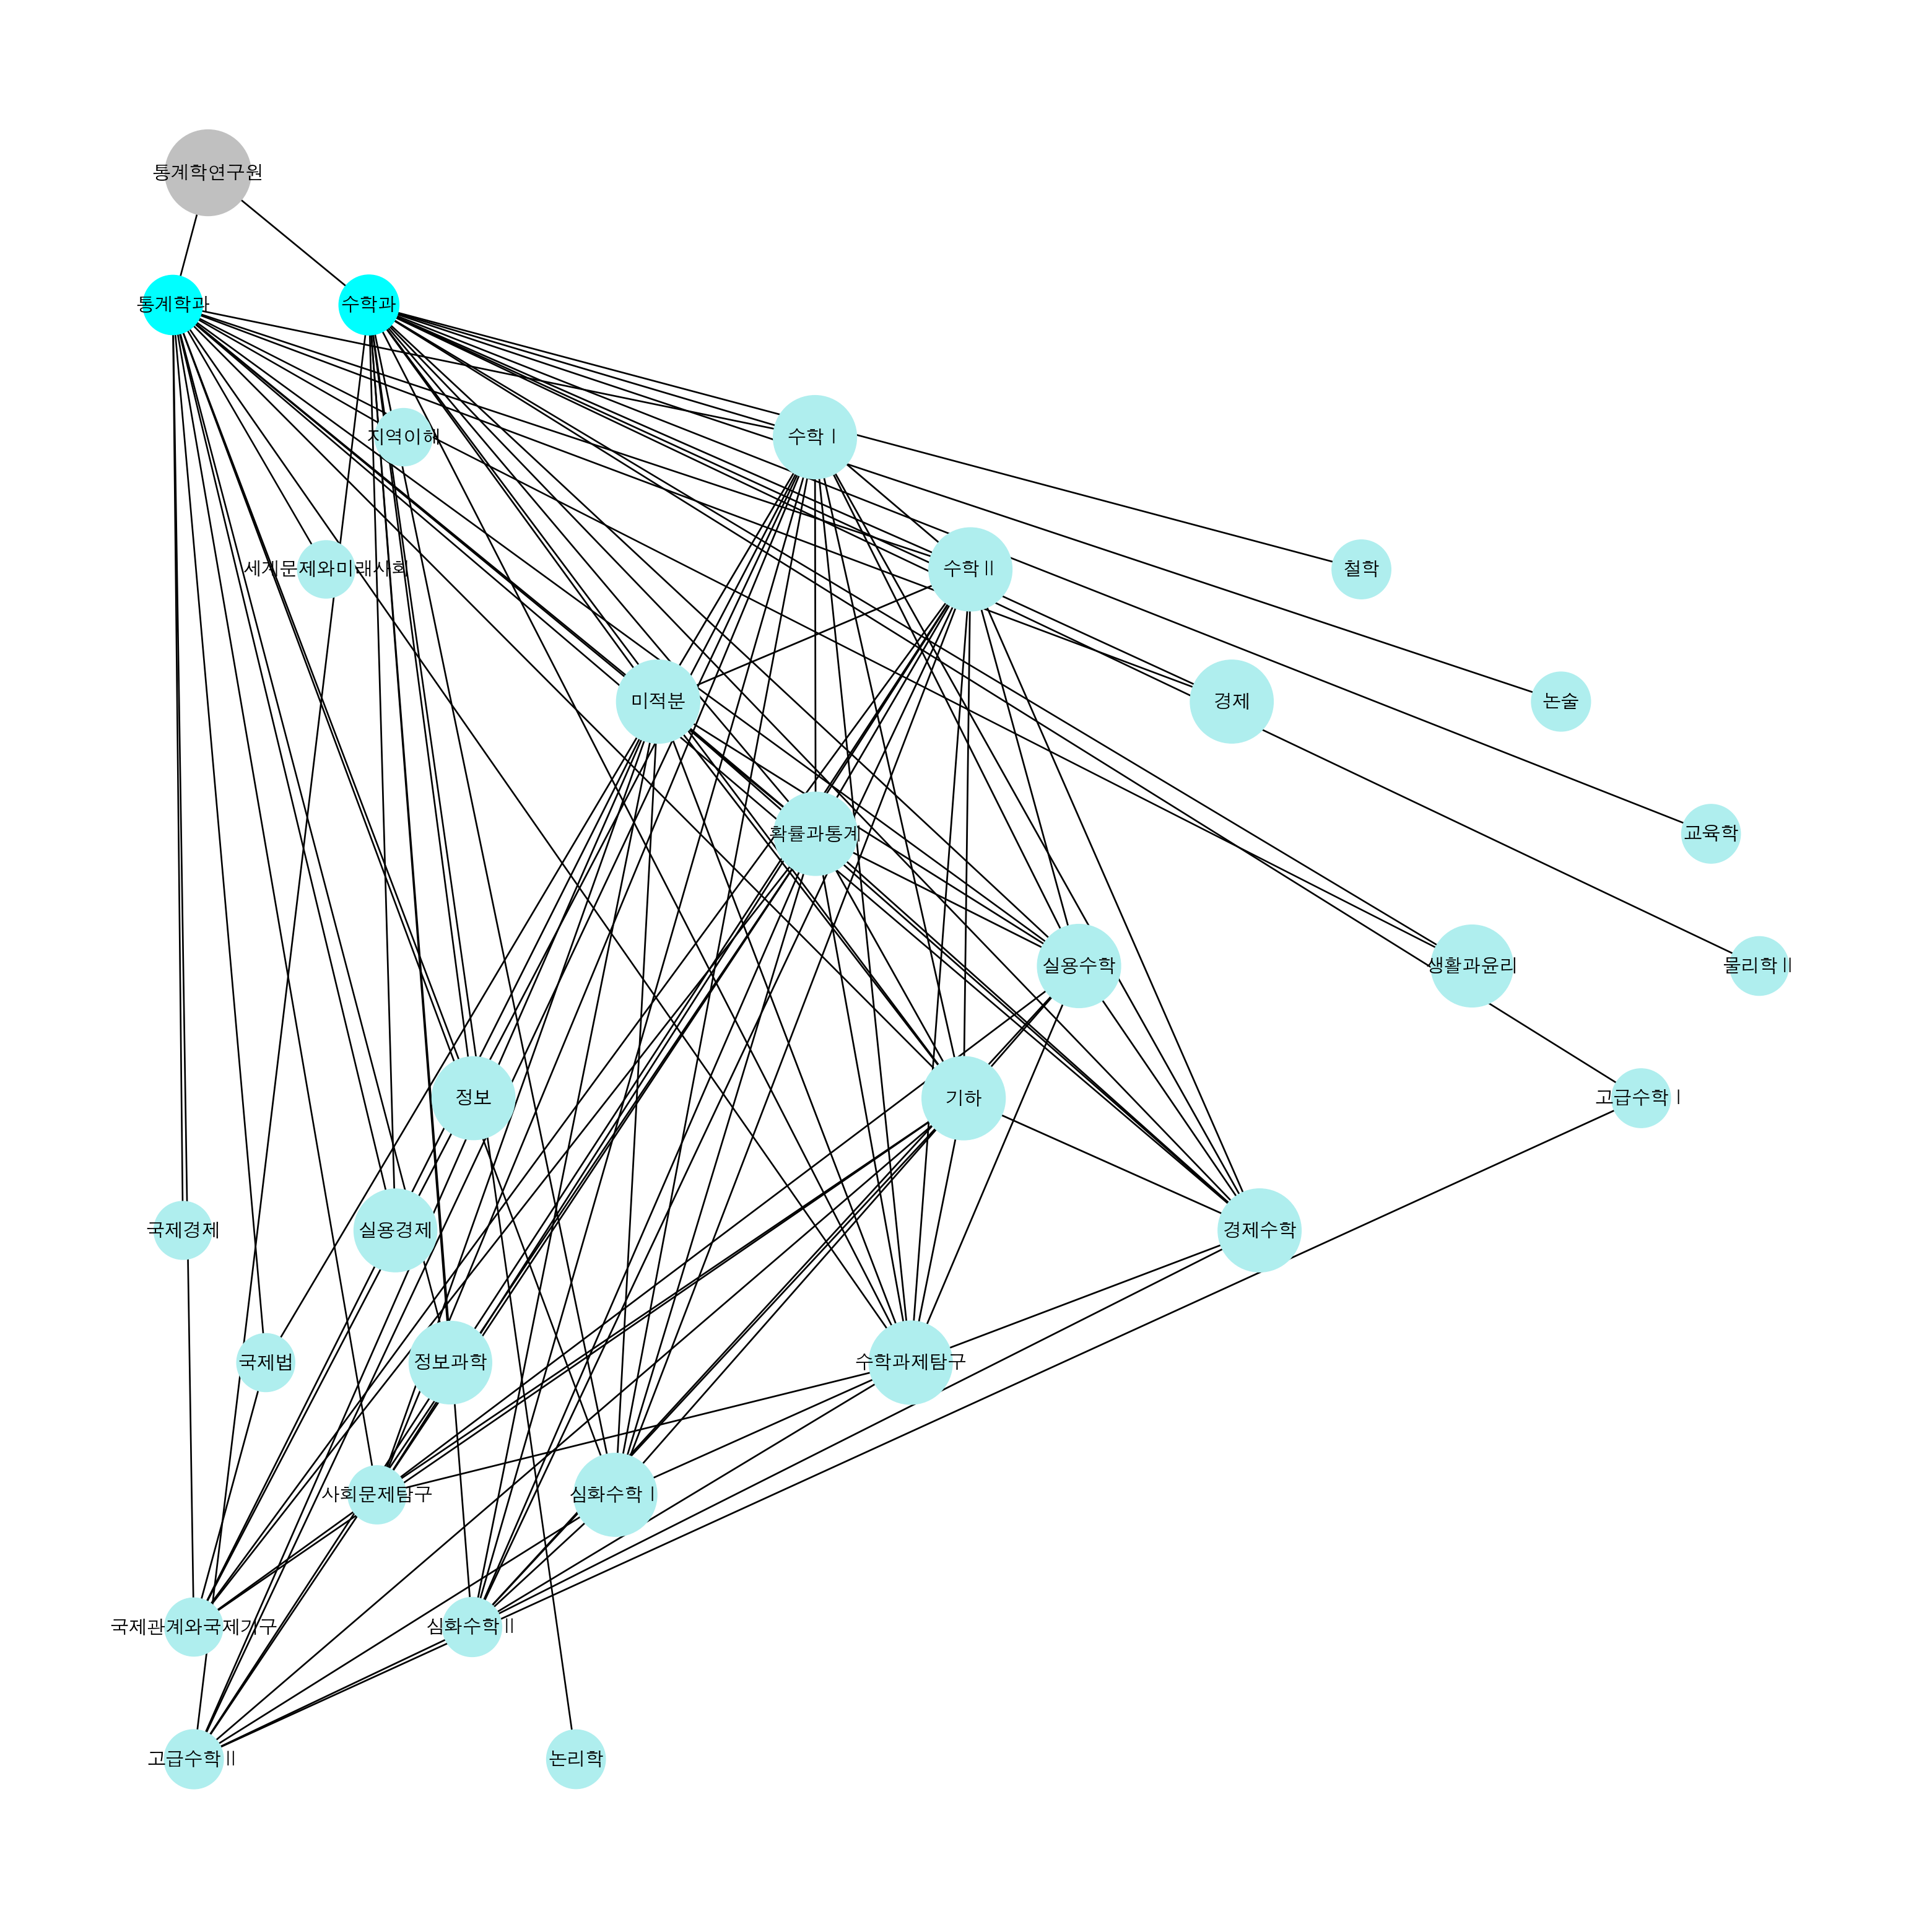

In [100]:
g = nx.Graph()
g.add_node(jobname, kind='job',weight = 2, color='silver')
g.add_nodes_from([(node, {'weight': attr, 'kind':'major', 'color' :'cyan' }) for (node, attr) in job_major_sim.items()])
g.add_nodes_from([(node, {'weight': attr, 'kind':'subject','color': 'paleturquoise'}) for (node, attr) in job_subject_sim_2.items()])

# g.add_nodes_from(subjects, kind='subject', color='paleturquoise')
g.add_weighted_edges_from(subject_subject, kind='subject-subject', color='silver')
g.add_weighted_edges_from(major_subject, kind='major-subject', color='silver')
g.add_weighted_edges_from(job_major, kind='job-major', color='silver')
# for n in category_details_edge_list:
#     g.add_edges_from(n, color='sandybrown')
node_colors = nx.get_node_attributes(g, 'color').values()
node_weight = nx.get_node_attributes(g, 'weight').values()
edge_colors = nx.get_edge_attributes(g, 'color').values()
edge_weight = nx.get_edge_attributes(g, 'weight').values()
num_node = g.number_of_nodes() 
# pos = nx.spectral_layout(g)
pos = nx.nx_agraph.graphviz_layout(g, prog="dot")
plt.figure(figsize=(g.number_of_nodes(), g.number_of_nodes()))
nx.draw(g,
        pos=pos,
        with_labels=True,
        font_family='Applegothic',
        # edge_color=edge_colors,
        node_color=node_colors,
        node_size = list(x*5000 for x in node_weight),
        font_size = num_node*0.7,
        width = list(x*2 for x in edge_weight)
)

# node_size=[v * 100 for v in node_sizes.values()])
# plt.savefig('results/'+file_name)


In [101]:
list(x*100 for x in node_weight)

[200,
 95.99694013595581,
 97.90630340576172,
 188.28386068344116,
 188.12074661254883,
 188.61217498779297,
 188.3245587348938,
 187.27295398712158,
 182.56454467773438,
 187.07082271575928,
 186.53442859649658,
 188.34439516067505,
 188.57102394104004,
 187.60721683502197,
 188.70971202850342,
 92.15673208236694,
 187.46936321258545,
 185.60642004013062,
 91.43167734146118,
 91.73651933670044,
 89.63726162910461,
 89.8409366607666,
 92.16710329055786,
 94.12216544151306,
 94.43437457084656,
 95.13668417930603,
 94.03189420700073,
 93.76994967460632,
 95.37002444267273,
 94.19648051261902,
 95.21748423576355]

In [102]:
nx.get_node_attributes(g, 'weight').values()

dict_values([2, 0.9599694, 0.97906303, 1.8828386, 1.8812075, 1.8861217, 1.8832456, 1.8727295, 1.8256454, 1.8707082, 1.8653443, 1.883444, 1.8857102, 1.8760722, 1.8870971, 0.9215673, 1.8746936, 1.8560642, 0.9143168, 0.9173652, 0.8963726, 0.89840937, 0.92167103, 0.94122165, 0.94434375, 0.95136684, 0.94031894, 0.9376995, 0.95370024, 0.9419648, 0.95217484])

In [103]:
def draw_graph(self, major_node_list, job_major_edge_list, subject_category_node_list, major_subject_edge_list, category_details_node_list, category_details_edge_list, horizontal=30, vertical = 30, file_name='graph.png'):
        
        g = nx.Graph()
        g.add_node(self.job, kind='직업', color='silver')
        g.add_nodes_from(major_node_list, kind='전공',
                         color='darkkhaki')
        g.add_nodes_from(subject_category_node_list,
                         kind='교과 유형', color='sandybrown')
        g.add_nodes_from(category_details_node_list,
                         kind='세부교과', color='paleturquoise')
        g.add_edges_from(job_major_edge_list, color='cyan')
        g.add_edges_from(major_subject_edge_list,
                         color='silver')
        for n in category_details_edge_list:
            g.add_edges_from(n, color='sandybrown')
        node_colors = nx.get_node_attributes(g, 'color').values()
        edge_colors = nx.get_edge_attributes(g, 'color').values()
        node_size = g.number_of_nodes()
        #pos = nx.spring_layout(g)
        pos = nx.nx_agraph.graphviz_layout(g, prog="sfdp")
        plt.figure(figsize=(g.number_of_nodes()*3.2, g.number_of_nodes()*3.2))
        nx.draw(g,
                pos=pos,
                with_labels=True,
                font_family='NanumGothic',
                edge_color=edge_colors,
                node_color=node_colors,
                node_size = node_size*9000,
                font_size = node_size*3,
                width = node_size/10)
        # node_size=[v * 100 for v in node_sizes.values()])
        plt.savefig('results/'+file_name)
